In [2]:
 import pandas as pd
df = pd.read_csv('dist5.csv')
#df.columns = ['MIZORAM', 'BIHAR', 'UTTAR PRADESH', 'UTTARANCHAL','HARYANA', 'DELHI']
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,STATE_UT_NAME
0,13.8,31.2,107.9,185.8,351.4,467.7,448.7,480.7,390.9,254.5,65.3,16.5,2814.4,MIZORAM
1,13.4,21.8,83.0,122.7,261.5,350.5,369.3,336.6,296.1,226.7,64.5,22.5,2168.6,MIZORAM
2,13.4,40.0,131.6,183.5,316.4,437.6,431.9,453.2,369.8,219.8,49.9,12.9,2660.0,MIZORAM
3,5.5,21.8,88.0,119.3,310.3,459.4,514.6,481.7,410.6,245.4,65.9,8.6,2731.1,MIZORAM
4,13.8,31.2,107.9,185.8,351.4,467.7,448.7,480.7,390.9,254.5,65.3,16.5,2814.4,MIZORAM


In [3]:
import matplotlib.pyplot as plt

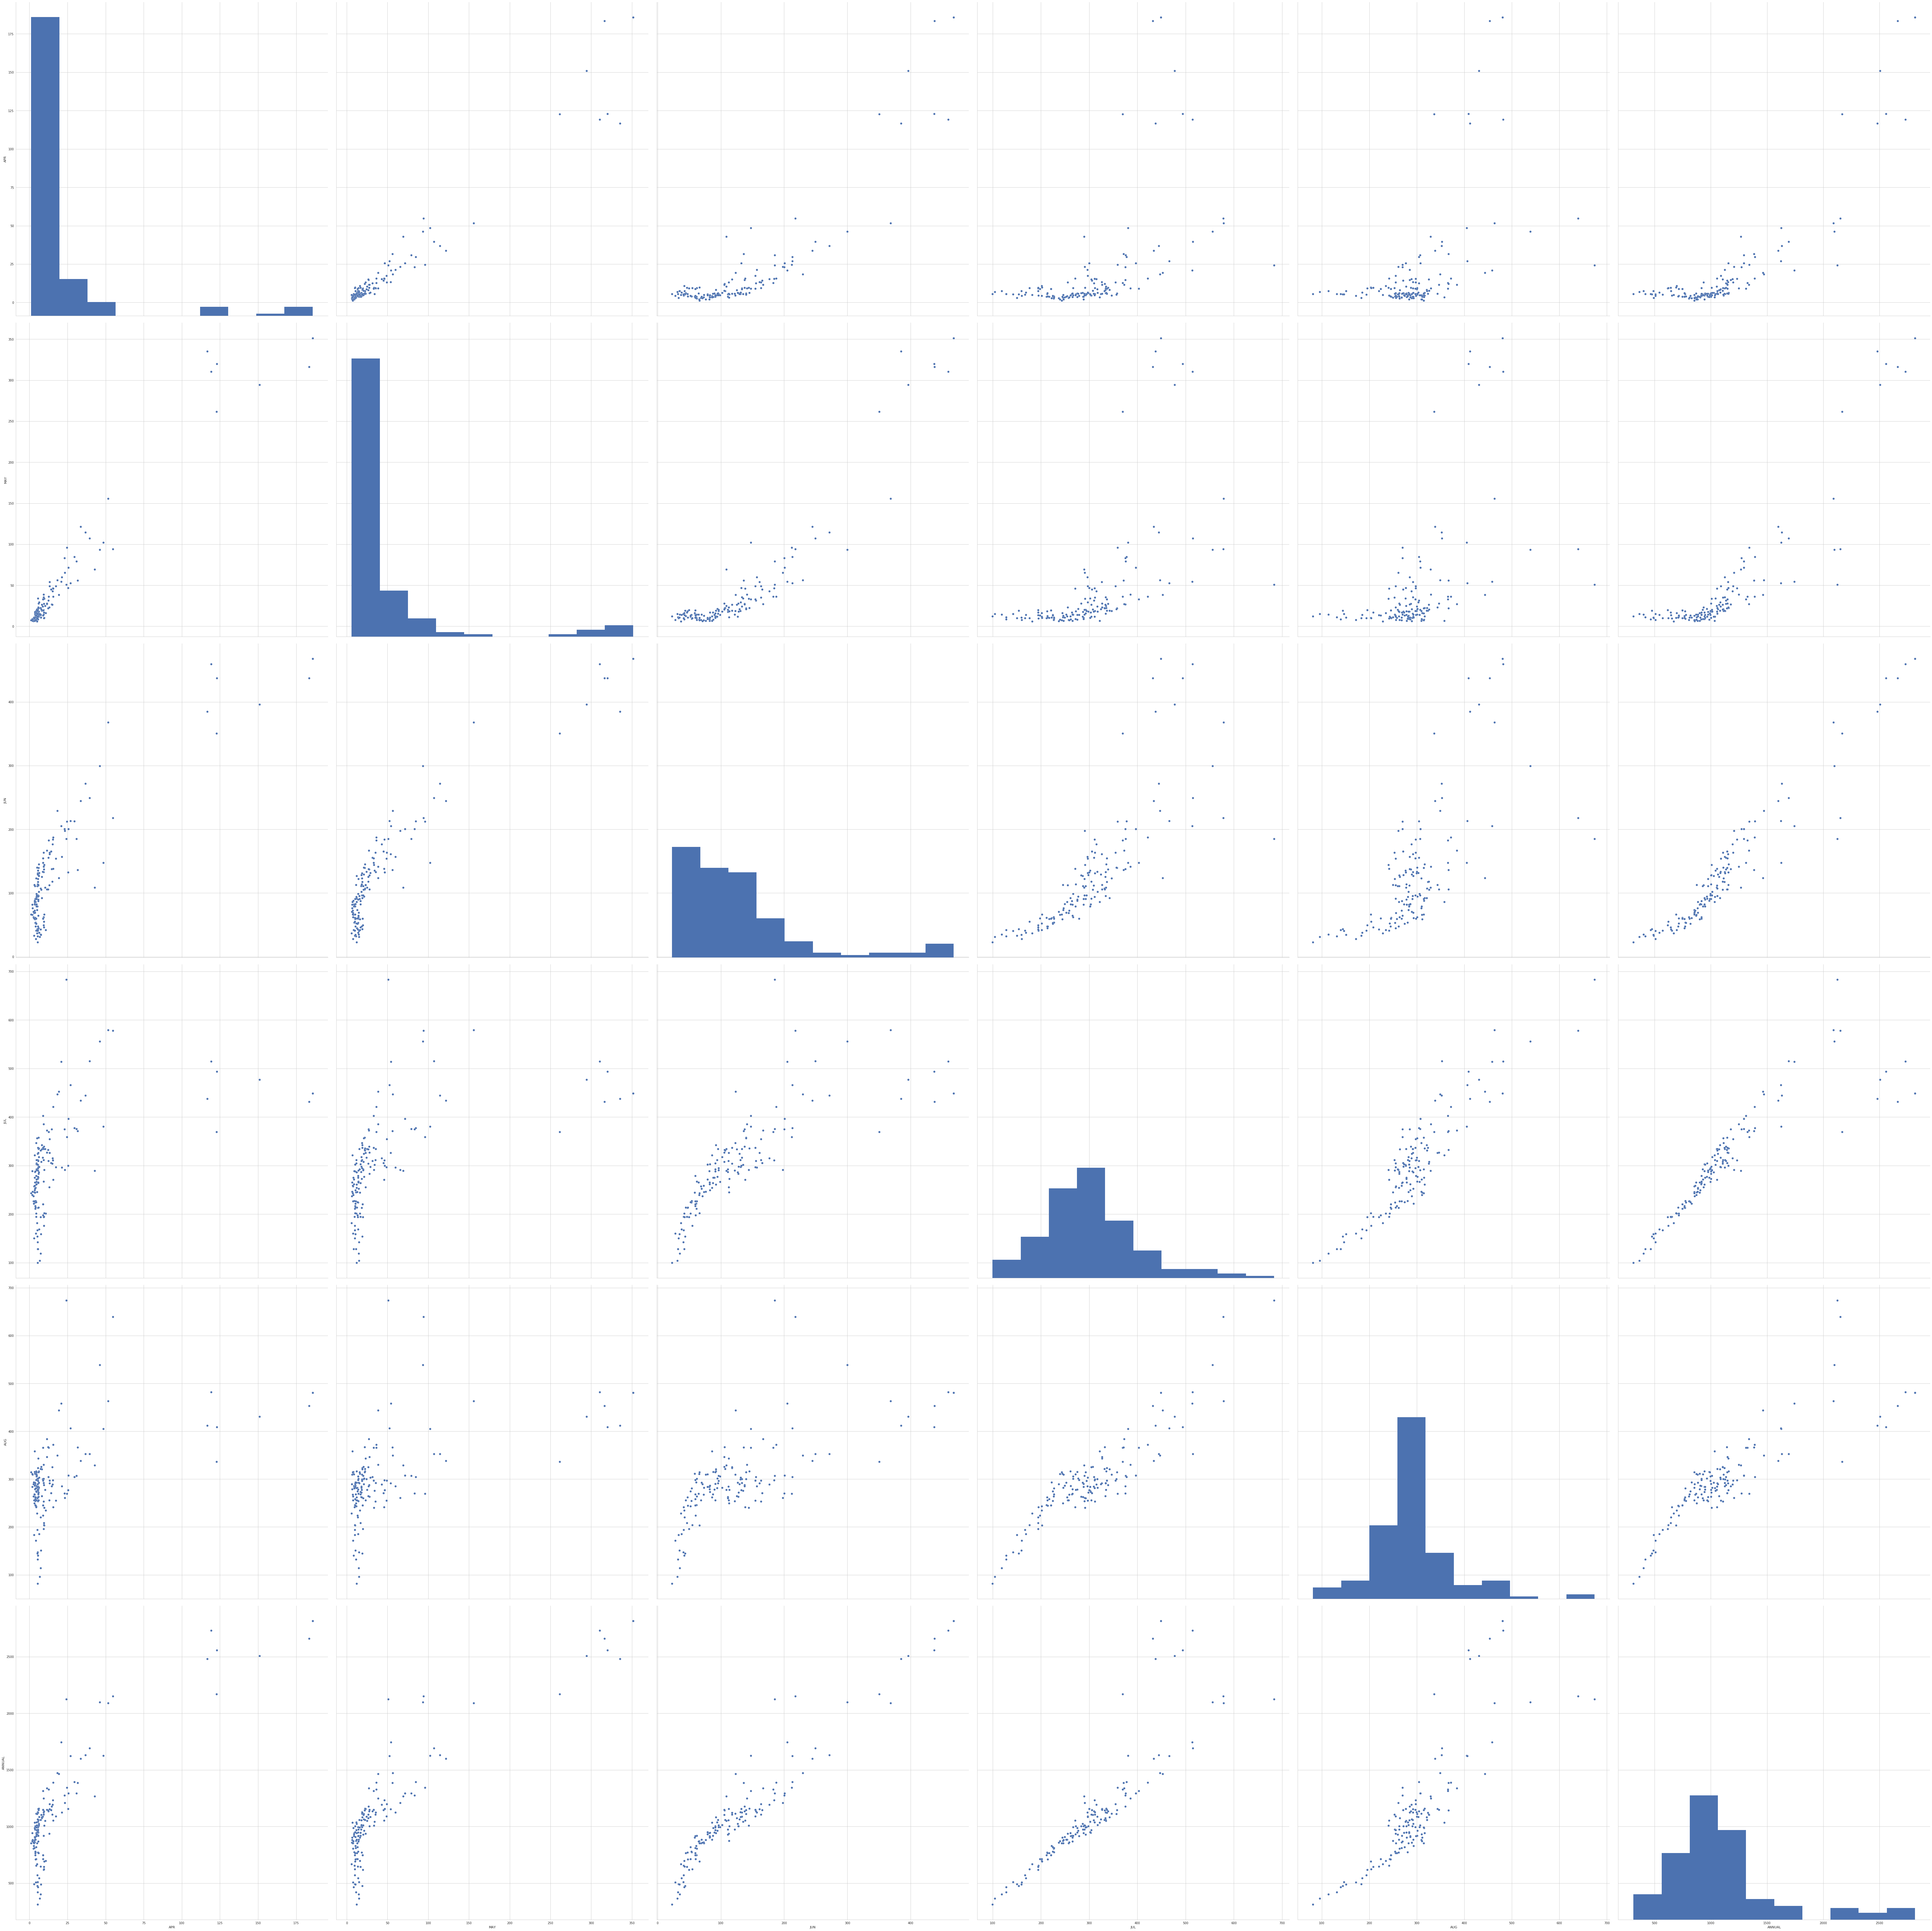

In [4]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['APR','MAY','JUN','JUL','AUG','ANNUAL']
sns.pairplot(df[cols], size=15);
plt.savefig('./dataly.png', dpi=300)
plt.show()

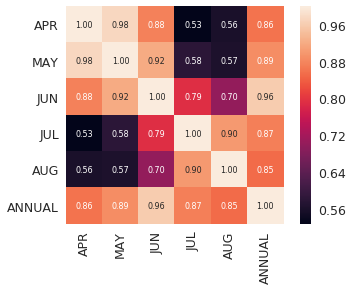

In [5]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 8},yticklabels=cols,xticklabels=cols)
plt.show()

In [6]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

/home/sandeep/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/sandeep/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


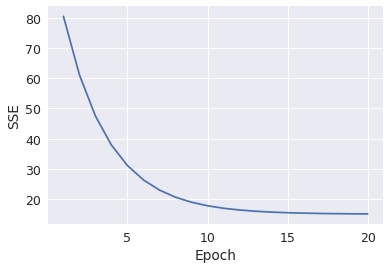

In [7]:
X = df[['AUG']].values
y = df['JUL'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(X_std, y_std)
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.savefig('./epoch.png', dpi=300)
plt.show()

In [8]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='purple')
    plt.plot(X, model.predict(X), color='red')
    return None

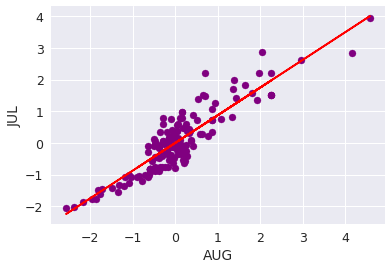

In [9]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('AUG')
plt.ylabel('JUL')
plt.savefig('./linear1.png', dpi=300)
plt.show()

In [10]:
num_rooms_std = sc_x.transform([300])
price_std = lr.predict(num_rooms_std)
print("Value of EXGREEN-MEAN: %.3f" % sc_y.inverse_transform(price_std))

Value of EXGREEN-MEAN: 305.725


/home/sandeep/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [11]:
print('Slope: %.3f' % lr.w_[1])

Slope: 0.875


In [12]:
print('Intercept: %.3f' % lr.w_[0])

Intercept: 0.000


In [13]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 1.059
Intercept: -11.667


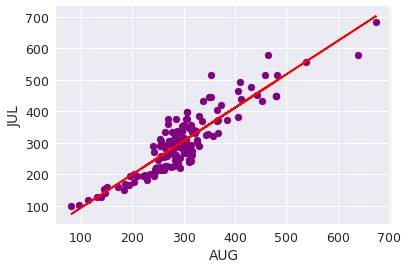

In [14]:
lin_regplot(X, y, slr)
plt.xlabel('AUG')
plt.ylabel('JUL')
plt.savefig('./linear2.png', dpi=300)
plt.show()